In [1]:
import json
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

In [166]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
! pip install -U gensim

In [3]:
! pip install -U spacy==2.2.3

     |████████████████████████████████| 10.4 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 54.6 MB/s eta 0:00:01
     |████████████████████████████████| 184 kB 75.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 22.9 MB/s eta 0:00:01
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.0
    Uninstalling srsly-2.4.0:
      Successfully uninstalled srsly-2.4.0
  Attempting uninstall: blis
    Found existing installation: blis 0.7.4
    Uninstalling blis-0.7.4:
      Successfully uninstalled blis-0.7.4
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.1
    Uninstalling thinc-8.0.1:
      Successfully uninstalled thinc-8.0.1
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.1
    Uninstalling catalogue-2.0.1:
      Successfully uninstalled catalogue-2.0.1
  Attempting uninstall: spacy
    Found existing installation: spacy 3.0.3
    Uninstalling spacy-3.0.3:
      Successfu

In [4]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 4.4 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011738 sha256=539f72da639fe394252441edbd8d31b7dc42ad194df3ab2e73f5b9bdcbec1012
  Stored in directory: /tmp/pip-ephem-wheel-cache-9sp_am_d/wheels/51/19/da/a3885266a3c241aff0ad2eb674ae058fd34a4870fef1c0a5a0
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.0.0
    Uninstalling en-core-web-sm-3.0.0:
      Successfully uninstalled en-core-web-sm-3.0.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [5]:
import spacy
from spacy.language import Language
from spacy.lang.es.stop_words import STOP_WORDS

In [6]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [7]:
from tqdm import tqdm_notebook as tqdm

In [8]:
KickStarterDataSet=pd.read_json('https://raw.githubusercontent.com/thousandoaks/topicmodelling/master/BEMM216Assignment.json')

In [9]:
KickStarterDataSet.head()

,about_description,currency_simbol,img_text_general,investors_all,location,no_created,opt_min,project_by,project_title,reached,...,region,currency,total_investors,goal,total_pledged,backers_new,backers_returning,backers_total,canceledTimeStamp,Language
0,Be part of building Cardiff's first pub theatr...,[£],https://ksr-ugc.imgix.net/assets/011/693/490/b...,[145],"Cardiff, UK",,"[2,500]",\nKate Wasserberg and Elizabeth Day\n,The Other Room – Cardiff’s First Pub Theatre,"[7,555]",...,UK,£,145,2500,7555.0,108.0,37.0,145.0,NaT,en
1,We plan to transition from 35mm to the new dig...,[$],https://ksr-ugc.imgix.net/assets/011/692/458/4...,[226],"Batesville, IN",,"[15,000]",\nKim Powell\n,"Small town theatre, the Gibson Theatre goes Di...","[18,185]",...,IN,$,226,15000,18185.0,184.0,42.0,226.0,NaT,en
2,"A place where innovation, food, creativity and...",[$],https://ksr-ugc.imgix.net/assets/011/867/084/5...,[263],"Seattle, WA",,"[35,000]",\nCafe Nordo/Ripple Productions\n,Nordo's Culinarium: Where Food Meets Art,"[39,304]",...,WA,$,263,35000,39304.0,83.0,180.0,263.0,NaT,en
3,Dad's Garage Theatre Company needs your help b...,[$],https://ksr-ugc.imgix.net/assets/011/859/287/e...,"[1,095]","Atlanta, GA",,"[116,000]",\nDad's Garage Theatre Company\n,Build the House of Dad's!,"[169,985]",...,GA,$,1095,116000,169985.0,515.0,580.0,1095.0,NaT,en
4,"Pangea House is a collectively run, all ages m...",[$],https://ksr-ugc.imgix.net/assets/011/843/324/6...,[118],"Minot, ND",,"[10,600]",\nPangea House Collective\n,Pangea House Revitalization Project,"[12,772]",...,ND,$,118,10600,12772.0,62.0,56.0,118.0,NaT,en


In [10]:
KickStarterDataSet.columns

Index(['about_description', 'currency_simbol', 'img_text_general',
       'investors_all', 'location', 'no_created', 'opt_min', 'project_by',
       'project_title', 'reached', 'status', 'tag', 'text_general',
       'text_risks', 'new_backers', 'returning_backers', 'supporting',
       'Unsuccessful', 'canceled', 'end_date', 'failure', 'start_date', 'city',
       'region', 'currency', 'total_investors', 'goal', 'total_pledged',
       'backers_new', 'backers_returning', 'backers_total',
       'canceledTimeStamp', 'Language'],
      dtype='object')

In [11]:
KickStarterDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 0 to 95694
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   about_description  5010 non-null   object 
 1   currency_simbol    5010 non-null   object 
 2   img_text_general   5010 non-null   object 
 3   investors_all      5010 non-null   object 
 4   location           5010 non-null   object 
 5   no_created         5010 non-null   object 
 6   opt_min            5010 non-null   object 
 7   project_by         5010 non-null   object 
 8   project_title      5010 non-null   object 
 9   reached            5010 non-null   object 
 10  status             5010 non-null   object 
 11  tag                5010 non-null   object 
 12  text_general       5010 non-null   object 
 13  text_risks         5010 non-null   object 
 14  new_backers        2751 non-null   object 
 15  returning_backers  2751 non-null   object 
 16  supporting         2751

In [12]:
pd.options.display.max_colwidth=1500

KickStarterDataSet[['text_risks','text_general']]

,text_risks,text_general
0,"A capital project is fraught with risks and challenges, but we’re confident with this support from Kickstarter we can overcome them. The biggest immediate challenge we face is hitting the minimum income eligibility required to register our charity officially. But once we raise just £2,500 more we can apply to Charities Commission to register officially, which opens a whole world of opportunity up to us! The registration process can take up to 40 days so the sooner we get our application in the better. We’re giving ourselves a big lead time to starting the build, ensuring we can realistically register and secure funding before work commences in January. As part of progressing the design of the theatre, we have to have the ceiling load tested and the room surveyed. This will help us design a theatre that is not only unbelievably sexy, but safe too. The sooner we can get the surveyor in, the more quickly we can deal with any issues, adapt the design where necessary, and finalise the details ready to go to the funders to apply for the £20,000 we need to commence the build. To minimise risk for this project, we’ve allowed the best part of a year to overcome these challenges. Once this foundation stage is completed we will know exactly what we are up against. This will help us overcome future obstacles on the road to building the first pub theatre in Cardiff. The benefits of the seed funding don’t stop at getting the build on the go. Achieving registered charity status as a dir...","“It's rare for a talented and successful director such as Kate to take the bold step of moving from an Associate position in a well-resourced regional theatre into the precarious territory of fringe producing and directing. The fact that this is a challenge that Kate is embracing is a testament both to her own vision and to the current potential of the Cardiff fringe scene.” John McGrath, Artistic Director, National Theatre Wales “Cardiff needs a new producing house of this scale and Kate Wasserberg is exactly the right person to run it. I am very excited by her plans and look forward to them becoming reality.” Tim Price, Playwright. “The Finborough has shown how ‘small theatre’ can create a national impact. That is Kate’s ambition for Cardiff. She has passion, professionalism, talent and an encyclopedic knowledge of Wales and its writers.” Terry Hands, Artistic Director, Clwyd Theatr Cymru\nYou can visit our website here. Or, like us on facebook and follow us on twitter.The Vision We wouldn’t want to be making work anywhere else in the world right now. The Other Room is a direct response to the overwhelming talent to be found in Cardiff and throughout Wales. Teeming with actors, writers, designers and directors of world-class quality, this city is the perfect place to establish a small producing house that makes bold, cutting edge theatre. Our vision is to build a theatre with a reputation comparable to venues such as the Finborough Theatre, King’s Head and The Gate. T..."
1,An initial challenge would be getting the word out to the public that the theatre has adopted to the new digital system. Marketing and advertising the new system would be a challenge. Training the staff on the new equipment and maintaining the equipment in good working condition could also be a potential obstacle.,"The historical Gibson Theatre in Batesville Indiana needs to make the change from 35 mm movies to the new digital format in order to remain open to continue to show movies.Our ultimate goal of the Gibson Theatre is to purchase and install the necessary equipment to covert from 35 mm movies to a digital system. We have applied for local grants and are in the process of doing fund raisers such as the Kickstarter Program and working with organizations in our local community to assist in reaching our goals of raising funds to meet matching grants. We have been working with the Rural Alliance of the Arts, the local community schools and the Chambers

In [113]:
KickStarterDataSetSmall=KickStarterDataSet.sample(500)

In [114]:
KickStarterDataSetSmall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 95530 to 68777
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   about_description  500 non-null    object 
 1   currency_simbol    500 non-null    object 
 2   img_text_general   500 non-null    object 
 3   investors_all      500 non-null    object 
 4   location           500 non-null    object 
 5   no_created         500 non-null    object 
 6   opt_min            500 non-null    object 
 7   project_by         500 non-null    object 
 8   project_title      500 non-null    object 
 9   reached            500 non-null    object 
 10  status             500 non-null    object 
 11  tag                500 non-null    object 
 12  text_general       500 non-null    object 
 13  text_risks         500 non-null    object 
 14  new_backers        280 non-null    object 
 15  returning_backers  280 non-null    object 
 16  supporting         2

# 1. Topic Modelling on Risks and Challenges

In [115]:
pd.options.display.max_colwidth=1500
KickStarterDataSetSmall['text_risks'].head()

95530                                                                                                                                                                                                                                                                                                                                This project is a unique experiment that gets a group of students, artists, and volunteers onto a closed urban site. Its success will not only depend on the earnest hard work of its participants, but also on the proper set-up and equipment.Without support we will have limited tools and cold volunteers. This project depends on coordinated participation and we need to make that as awesome an experience as possible! Thanks for your help!
88626                                                                                                                                                                                                                                       

In [116]:
KickStarterDataSetSmall[['text_risks']]

,text_risks
95530,"This project is a unique experiment that gets a group of students, artists, and volunteers onto a closed urban site. Its success will not only depend on the earnest hard work of its participants, but also on the proper set-up and equipment.Without support we will have limited tools and cold volunteers. This project depends on coordinated participation and we need to make that as awesome an experience as possible! Thanks for your help!"
88626,"Making of my film “War Front” has and will have many obstacles for me to overcome. One being my age, I am very young and trying to be as professional as I can while working with college actors and older crew members. I have to assert myself as a person of authority on the set. Once I have over come these issues I still have thousands of other filmmakers to compete against at the AAHSFF (All American High School Film Festival)."
38652,"Denhac has already moved from their previous space in north Denver to the OMF building, but your support is needed to fulfill the vision of this revolutionary hackerspace."
57640,"The challenge till now has been a weight. Thinking, how can we do this alone? This challenge brought us to the conclusion that we shouldn't and we don't have to. We are surrounded by a loving community that is learning about us and supporting us in the endeavors. We recently altered the model of our garden from a mainly production, for profit garden to a more community based, local food forest model. This space was once a home occupied with people who were forced to leave after Katrina. We want to honor the lot by developing it into a nurturing arm, a communal space to grow food and self, to meet new people and to interact and learn from one another. We want this space to be a true community garden and wellness space, and we can make it happen."
57119,"The obstacles I face now are trivial. Permits and transition from my current occupation are at the top of my list. There is nothing that I have not set my mind to that I did not accomplished and this catering venue will be my greatest. The challenges and struggles in my live have only delayed what I know will be great. I have worked long and hard and will never give in. With your help this is possible and will happen. I thank you all for your time and patience. Even to those who can not assist, I pray that this inspires you to never give up on your dreams."
...,...
95638,"We will be installing a mural in a region of the world that I have never traveled to before. Challenges include potential sickness of unfamiliar origins. Such is the risk we all take when we travel far outside of the comforts of our locality.It should be noted that I run my art school singlehandedly, meaning it may take additional time than estimated to send out hundreds of rewards to my fantastic, loyal, and generous supporters."
76396,"Laptop could crap out, but I have a backup Ipad. Might be a trickier/more expensive audio interface."
52997,"Thanks for reading this far.We've invested our time and all of our money into making this happen. We are committed to the growth and success of this project and we are finally in a position to make our vision a reality. Your support will not only make this possible but show that we have the backing of the community we want to serve.There will be challenges, as there are with any project but we have the grit and determination to do all we can to make sure these can be overcome.We are transforming this 100 year old shop into a modern and functional cycle cafe with all the facilities required to provide the best service possible. We will be fitting new toilets as well as a kitchen, building a bar, bicycle racks, seating and furniture and expanding our current workshop equipment. We have the knowledge and skills required to provide you (the community) with efficient bike repairs as well as fantastic food every day, we need your help to make it possible. We've called in favours and contacted long lost relatives 

## 1.1. First we need to build our corpus and dictionary

In [117]:
Text=KickStarterDataSetSmall[['text_risks']].apply(lambda x: ''.join(x), axis=1)

In [118]:
type(Text)

pandas.core.series.Series

In [119]:
TextClean=Text.replace('\n',',', regex=True).replace('\t',',', regex=True).replace('\xa0',' ',regex=True)

In [120]:
TextClean

95530                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               This project is a unique experiment that gets a group of students, artists, and volunteers onto a cl

In [121]:
del Text

### 1.1.1. Let's remove stopwords

In [122]:
import en_core_web_sm

In [123]:
nlp = en_core_web_sm.load()

In [124]:
print('Number of stop words: %d' % len(spacy.lang.es.stop_words.STOP_WORDS))

Number of stop words: 551


In [125]:
print(nlp.Defaults.stop_words)

{'across', "n't", 'everyone', 'another', 'ca', 'between', 'whereas', 'becomes', 'few', 'more', 'toward', 'besides', 'nor', 'yet', 'full', '’d', 'them', 'your', 'afterwards', 'noone', 'no', 'here', 'now', 'these', 'whereafter', "'s", 'where', 'fifty', 'behind', 'and', 'so', 'against', 'first', 'most', 'why', 'somewhere', 'who', '‘ll', 'else', 'her', 'back', '‘s', 'own', 'being', 'since', 'amongst', 'some', 'beside', 'used', 'rather', 'yours', 'via', 'upon', 'further', 'into', 'perhaps', 'down', 'due', 'might', 'take', 'get', "'ll", 'must', "'d", 'by', 'namely', 'whatever', 'was', 'did', 'already', 'except', 'nine', 'be', 'without', 'not', 'call', 'any', 'from', 'just', 'then', 'me', 'if', 'his', 'keep', 'hence', 'in', 'what', 'onto', 'to', 'ourselves', 'same', 'we', 'therefore', 'twenty', 'for', 'i', 'whenever', 'among', 'the', 'though', '’ve', 'everything', 'thereby', 'below', 'of', 'fifteen', 'over', 'whither', 'a', 'through', 'n‘t', 'thus', 'about', 'under', 'whoever', 'would', 'put'

In [126]:
customize_stop_words = [
    "d","la","en","y",'de','el','que','Ambulante','e','con','un','di','del'
]
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [127]:

def remove_stopwords(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

In [128]:
# The add_pipe function appends our functions to the default pipeline.

nlp.add_pipe(remove_stopwords, name='remove_stopwords', last=True)

In [129]:
print(nlp.pipe_names)

['tagger', 'parser', 'ner', 'remove_stopwords']


In [130]:
nlp(doc)

['Working',
 'natural',
 'elements',
 'soil',
 'seeds',
 'weather',
 'presents',
 'certain',
 'unpredictability',
 'beauty',
 'challenges',
 'failure',
 'represent',
 'educational',
 'opportunity',
 'study',
 'causes',
 'effects',
 'biological',
 'systems',
 'time',
 'space',
 'provide',
 'multiple',
 'trials',
 'Additionally',
 'musical',
 'tools',
 'developing',
 'project',
 'prototyped',
 'Music',
 'Box',
 'Tampa',
 'Bay',
 'undergone',
 'rigorous',
 'community',
 'testing',
 'confident',
 'ability',
 'incite',
 'joy']

### 1.1.2. Let's Tokenize

In [131]:
doc_list = []
# Iterates through each article in the corpus.
for doc in tqdm(TextClean):
    # Passes that article through the pipeline and adds to a new list.
    pr = nlp(doc)
    ## we get rid of those pesky whitespaces
    
    try:
        prClean=list(filter(lambda a: a !=' ',pr))
        #print('got one pesky wwhitespace')
    except:
        pass
    
    #print(pr)
    
    doc_list.append(prClean)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/500 [00:00<?, ?it/s]

In [132]:
len(doc_list)

500

In [133]:
doc_list[0]

['project',
 'unique',
 'experiment',
 'gets',
 'group',
 'students',
 'artists',
 'volunteers',
 'closed',
 'urban',
 'site',
 'success',
 'depend',
 'earnest',
 'hard',
 'work',
 'participants',
 'proper',
 'set',
 'equipment',
 'support',
 'limited',
 'tools',
 'cold',
 'volunteers',
 'project',
 'depends',
 'coordinated',
 'participation',
 'need',
 'awesome',
 'experience',
 'possible',
 'Thanks',
 'help']

In [134]:
doc_list[1]

['Making',
 'film',
 'War',
 'obstacles',
 'overcome',
 'age',
 'young',
 'trying',
 'professional',
 'working',
 'college',
 'actors',
 'older',
 'crew',
 'members',
 'assert',
 'person',
 'authority',
 'set',
 'come',
 'issues',
 'thousands',
 'filmmakers',
 'compete',
 'AAHSFF',
 'American',
 'High',
 'School',
 'Film',
 'Festival']

### 1.1.3. Let's compute BiGrams

In [135]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(doc_list, min_count=20)
for idx in range(len(doc_list)):
    for token in bigram[doc_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            doc_list[idx].append(token)

In [136]:
bigram.vocab

defaultdict(int,
            {b'project': 242,
             b'unique': 20,
             b'project_unique': 1,
             b'experiment': 5,
             b'unique_experiment': 1,
             b'gets': 4,
             b'experiment_gets': 1,
             b'group': 27,
             b'gets_group': 1,
             b'students': 19,
             b'group_students': 1,
             b'artists': 47,
             b'students_artists': 1,
             b'volunteers': 21,
             b'artists_volunteers': 1,
             b'closed': 3,
             b'volunteers_closed': 1,
             b'urban': 2,
             b'closed_urban': 1,
             b'site': 23,
             b'urban_site': 1,
             b'success': 25,
             b'site_success': 1,
             b'depend': 4,
             b'success_depend': 2,
             b'earnest': 2,
             b'depend_earnest': 1,
             b'hard': 33,
             b'earnest_hard': 1,
             b'work': 147,
             b'hard_work': 6,
             b'p

### 1.1.4. Let's build our Dictionary 

In [137]:
# Creates, which is a mapping of word IDs to words.
TextCleanWords = corpora.Dictionary(doc_list)

In [138]:
len(TextCleanWords)

6970

In [139]:
for k, v in TextCleanWords.token2id.items():
    print(k, v)

Thanks 0
artists 1
awesome 2
closed 3
cold 4
coordinated 5
depend 6
depends 7
earnest 8
equipment 9
experience 10
experiment 11
gets 12
group 13
hard 14
help 15
limited 16
need 17
participants 18
participation 19
possible 20
project 21
proper 22
set 23
site 24
students 25
success 26
support 27
tools 28
unique 29
urban 30
volunteers 31
work 32
AAHSFF 33
American 34
Festival 35
Film 36
High 37
Making 38
School 39
War 40
actors 41
age 42
assert 43
authority 44
college 45
come 46
compete 47
crew 48
film 49
filmmakers 50
issues 51
members 52
obstacles 53
older 54
overcome 55
person 56
professional 57
thousands 58
trying 59
working 60
young 61
Denhac 62
Denver 63
OMF 64
building 65
fulfill 66
hackerspace 67
moved 68
needed 69
north 70
previous 71
revolutionary 72
space 73
vision 74
Katrina 75
Thinking 76
altered 77
arm 78
based 79
brought 80
challenge 81
communal 82
community 83
conclusion 84
developing 85
endeavors 86
food 87
forced 88
forest 89
garden 90
grow 91
happen 92
home 93
honor 94


### 1.1.4. Let's build our Corpus

In [140]:
# Turns each document into a bag of words.
TextCleanWordsCorpus = [TextCleanWords.doc2bow(doc) for doc in doc_list]

In [141]:
TextCleanWordsCorpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1)],
 [(23, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(27, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1)],
 [(73, 4),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 3),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88,

In [142]:
type(TextCleanWordsCorpus)

list

In [143]:
len(TextCleanWordsCorpus)

500

In [144]:
TextCleanWordsCorpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 2),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 2),
 (32, 1)]

In [145]:
TextCleanWordsCorpus[200]

[(17, 4),
 (27, 1),
 (32, 1),
 (52, 1),
 (60, 2),
 (65, 1),
 (87, 1),
 (103, 1),
 (142, 2),
 (229, 1),
 (257, 1),
 (277, 1),
 (427, 1),
 (548, 2),
 (549, 2),
 (555, 1),
 (614, 1),
 (678, 1),
 (692, 1),
 (722, 2),
 (733, 1),
 (793, 1),
 (816, 1),
 (835, 1),
 (867, 1),
 (1152, 1),
 (1230, 1),
 (1368, 1),
 (1425, 1),
 (1430, 1),
 (1518, 1),
 (1608, 1),
 (1774, 1),
 (2035, 1),
 (2250, 1),
 (2720, 1),
 (2833, 1),
 (3172, 1),
 (3423, 2),
 (3528, 1),
 (3542, 1),
 (3841, 1),
 (4053, 1),
 (4054, 3),
 (4055, 1),
 (4056, 1),
 (4057, 1),
 (4058, 1),
 (4059, 2),
 (4060, 1),
 (4061, 1),
 (4062, 1),
 (4063, 1),
 (4064, 1),
 (4065, 1),
 (4066, 1),
 (4067, 1),
 (4068, 1),
 (4069, 1)]

## 1.2. We are ready do to some topic modelling, Let's try with 4 topics initially

In [146]:
ldamodelTopics = gensim.models.ldamodel.LdaModel(corpus=TextCleanWordsCorpus, num_topics=4,id2word=TextCleanWords)

In [147]:
ldamodelTopics.print_topics()

[(0,
  '0.006*"time" + 0.006*"people" + 0.006*"challenge" + 0.005*"project" + 0.005*"work" + 0.005*"need" + 0.004*"challenges" + 0.004*"help" + 0.003*"possible" + 0.003*"biggest"'),
 (1,
  '0.008*"time" + 0.006*"project" + 0.005*"work" + 0.004*"challenges" + 0.004*"funding" + 0.004*"challenge" + 0.003*"help" + 0.003*"new" + 0.003*"confident" + 0.003*"production"'),
 (2,
  '0.008*"project" + 0.006*"time" + 0.005*"need" + 0.005*"challenge" + 0.005*"work" + 0.004*"years" + 0.004*"challenges" + 0.004*"community" + 0.004*"experience" + 0.004*"risks"'),
 (3,
  '0.012*"project" + 0.005*"time" + 0.005*"help" + 0.005*"risk" + 0.005*"challenges" + 0.004*"need" + 0.004*"work" + 0.004*"challenge" + 0.004*"support" + 0.004*"people"')]

In [148]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=ldamodelTopics,  corpus=TextCleanWordsCorpus, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -1.85581751519408


### 1.3 Is this good enough ? We don't know we need to try with several values to find the optima

In [149]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics,id2word=dictionary)
        
        
        model_list.append(model)
        
        coherencemodel= CoherenceModel(model=model,  corpus=corpus, coherence="u_mass")
        
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

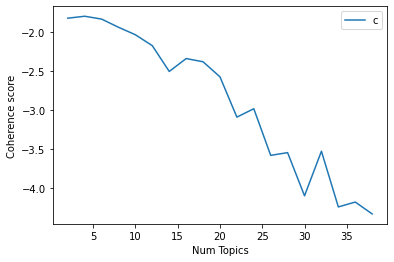

In [151]:


model_list, coherence_values = compute_coherence_values(dictionary=TextCleanWords, corpus=TextCleanWordsCorpus, texts=doc_list, start=2, limit=40, step=2)
# Show graph

limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
3

### based on the previous figure we select 12 topics (a local minima and not too many topics)

## 1.4. We choose  12 topics

In [152]:
ldamodel12Topics = gensim.models.ldamodel.LdaModel(corpus=TextCleanWordsCorpus, num_topics=12,id2word=TextCleanWords)

In [153]:
# Compute Coherence Score using UMass
ldamodel12TopicsCoherenceModel = CoherenceModel(model=ldamodel12Topics, texts=doc_list, dictionary=TextCleanWords, coherence="u_mass")
coherence_lda = ldamodel12TopicsCoherenceModel.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -1.9677088857008853


In [154]:
ldamodel12TopicsCoherenceModel.get_coherence_per_topic()

[-1.937602363701638,
 -1.8824852640166228,
 -1.9447555064044357,
 -1.9045030851207763,
 -1.9782007011225333,
 -2.7158159045319334,
 -1.9027816035211398,
 -1.8071594844011691,
 -1.7790901422755245,
 -1.8432180821937865,
 -2.0028931725956753,
 -1.9140013185253906]

In [155]:
ldamodel12Topics.print_topics(num_words=10)

[(0,
  '0.009*"project" + 0.007*"time" + 0.006*"challenges" + 0.006*"risk" + 0.005*"help" + 0.005*"need" + 0.005*"risks" + 0.004*"team" + 0.004*"experience" + 0.004*"working"'),
 (1,
  '0.009*"time" + 0.009*"project" + 0.005*"community" + 0.005*"challenge" + 0.005*"help" + 0.005*"challenges" + 0.004*"production" + 0.004*"possible" + 0.004*"work" + 0.003*"risks"'),
 (2,
  '0.007*"challenge" + 0.007*"people" + 0.006*"work" + 0.006*"project" + 0.005*"need" + 0.004*"support" + 0.004*"hope" + 0.003*"possible" + 0.003*"time" + 0.003*"goal"'),
 (3,
  '0.011*"need" + 0.006*"project" + 0.006*"challenge" + 0.005*"things" + 0.004*"risk" + 0.004*"great" + 0.004*"plan" + 0.004*"people" + 0.004*"time" + 0.004*"know"'),
 (4,
  '0.010*"time" + 0.007*"need" + 0.005*"project" + 0.005*"work" + 0.005*"support" + 0.005*"risk" + 0.004*"help" + 0.004*"space" + 0.003*"new" + 0.003*"year"'),
 (5,
  '0.007*"challenges" + 0.006*"project" + 0.006*"help" + 0.005*"work" + 0.004*"garden" + 0.004*"ensure" + 0.003*"ti

In [156]:
## we save our 12 topic model

ldamodel12Topics.save('./12TopicsGeneralRisksAndChallenges.lda')

## now that we have our topic modelling engine ready we can compute topics out of any text we need

In [157]:
KickStarterDataSetSmall['text_risks'].iloc[9]

'Nugget & Mallow will be re launching on 1st July 2015. The website will go live on this date, enabling customers to order marshmallows and place bookings for the Marshmallow Tea Club. The money raised through this campaign will go towards funding preparations for fulfilling larger orders and setting up the Tea Club. I have been making marshmallows for over 5 years, and my production system for handmaking mallows through to delivery is well practiced and established. The process of sourcing a venue for the Tea Club is under way, and although I will undoubtedly face some challenges in the meantime, I am confident that the re launch of Nugget & Mallow will be achieved in spite of the fundraising goal. The experience I have gained in setting up and running Nugget & Mallow in the recent years will help facilitate this, and the delicious incentives I have lined up for anyone who pledges will not be comprised.'

In [158]:
ExampleTest=KickStarterDataSetSmall['text_risks'].iloc[9]

In [159]:
ExampleTest

'Nugget & Mallow will be re launching on 1st July 2015. The website will go live on this date, enabling customers to order marshmallows and place bookings for the Marshmallow Tea Club. The money raised through this campaign will go towards funding preparations for fulfilling larger orders and setting up the Tea Club. I have been making marshmallows for over 5 years, and my production system for handmaking mallows through to delivery is well practiced and established. The process of sourcing a venue for the Tea Club is under way, and although I will undoubtedly face some challenges in the meantime, I am confident that the re launch of Nugget & Mallow will be achieved in spite of the fundraising goal. The experience I have gained in setting up and running Nugget & Mallow in the recent years will help facilitate this, and the delicious incentives I have lined up for anyone who pledges will not be comprised.'

In [160]:
ldamodel12Topics.get_document_topics(TextCleanWords.doc2bow(nlp(ExampleTest)),minimum_probability=0.00001)


[(0, 0.0011263858),
 (1, 0.0011263895),
 (2, 0.0011263837),
 (3, 0.0011263802),
 (4, 0.0011263852),
 (5, 0.0011263845),
 (6, 0.98760974),
 (7, 0.001126396),
 (8, 0.0011263851),
 (9, 0.0011263851),
 (10, 0.001126383),
 (11, 0.0011263896)]

## The above means that ExampleTest is mosly about topic6  (0.98)

## 2.0 Let's compute the topics for each Risk and Challenge Text

In [161]:
KickStarterDataSetSmall['text_risks_topics']=KickStarterDataSetSmall['text_risks'].apply(lambda x: ldamodel12Topics.get_document_topics(TextCleanWords.doc2bow(nlp(x)),minimum_probability=0.00001))


In [165]:
KickStarterDataSetSmall.sample()

,about_description,currency_simbol,img_text_general,investors_all,location,no_created,opt_min,project_by,project_title,reached,...,currency,total_investors,goal,total_pledged,backers_new,backers_returning,backers_total,canceledTimeStamp,Language,text_risks_topics
31821,This will be a 150' x 12' scenic wilderness landscape depicting Southern Oregon and featuring the Rogue River in Grants Pass.,[US$],https://ksr-ugc.imgix.net/assets/011/861/413/b19dcb5ac6bf33e3d1547af96e524033_original.jpg?crop=faces&w=1024&h=576&fit=crop&v=1463705673&auto=format&q=92&s=73b75a85a0491a10de7021671e01a51f,[16],"Grants Pass, OR",First created,"[11,500]",Lisa Volkert,The Gateway Mural,[882],...,US$,16,11500,882.0,7.0,9.0,16.0,NaT,en,"[(0, 0.0039693005), (1, 0.003969248), (2, 0.00396937), (3, 0.0039692856), (4, 0.003969282), (5, 0.003969251), (6, 0.003969284), (7, 0.9563379), (8, 0.003969248), (9, 0.0039692763), (10, 0.0039692586), (11, 0.003969265)]"


In [167]:
riskTopics=pd.DataFrame(KickStarterDataSetSmall['text_risks_topics'].tolist(), index=KickStarterDataSetSmall.index,columns=['riskstopic0','riskstopic1','riskstopic2','riskstopic3','riskstopic4','risktopic5','risktopic6','risktopic7','risktopic8','risktopic9','risktopic10','risktopic11']) 

In [168]:
riskTopics=riskTopics.applymap(lambda x: x[1])

In [169]:
KickStarterDataSetSmallWithRiskTopics=pd.concat([KickStarterDataSetSmall, riskTopics], axis=1)

In [170]:
KickStarterDataSetSmallWithRiskTopics

,about_description,currency_simbol,img_text_general,investors_all,location,no_created,opt_min,project_by,project_title,reached,...,riskstopic2,riskstopic3,riskstopic4,risktopic5,risktopic6,risktopic7,risktopic8,risktopic9,risktopic10,risktopic11
95530,"Site 1121 is a group of students, artists, and neighborhood activists creating an intriguing temporary landscape in a vacant urban lot.",[$],https://ksr-ugc.imgix.net/assets/012/400/915/ae6924a1ef48cb5bf48ab2193c20528d_original.jpg?crop=faces&w=1552&h=873&fit=crop&v=1463759279&auto=format&q=92&s=8da57706b1b2d207ecc5b61b17cfcae9,[20],"Seattle, WA",,"[5,000]",\nBritton Shepard\n,Site 1121: Field Notes. An experimental urban landscape.,"[5,010]",...,0.002315,0.002315,0.002315,0.002315,0.002315,0.002315,0.974531,0.002315,0.002315,0.002315
88626,Four Men One Room Whole New Type Of War Film.,[US$],https://ksr-ugc.imgix.net/assets/012/400/174/dde857c1ff9efad466bf680c92d929e3_original.jpg?crop=faces&w=1024&h=576&fit=crop&v=1463759220&auto=format&q=92&s=b3872b1272c42b70d4f61c047a3eac42,[13],"Boise, ID",First created,"[5,500]",Thatcher Nelson,War Front,"[1,647]",...,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,0.970419,0.002689
38652,Help Denhac and Open Media Foundation bring Denver's first and best hackerspace to a bigger and better location at 7th & Santa Fe!,[US$],https://ksr-ugc.imgix.net/assets/011/927/440/4e6ef19f9ed311c6dd502c2fcae09652_original.jpg?crop=faces&w=1024&h=576&fit=crop&v=1463716183&auto=format&q=92&s=61b77c5a746b5feaf529da3067003a24,[18],"Denver, CO",2 created,"[10,000]",Open Media Foundation,DENHAC: Denver's Collaborative Hackerspace,"[1,761]",...,0.938871,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557
57640,"B.F.F. is a sustainable neighborhood garden project using passion and permaculture to create a beautiful, productive community model.",[$],https://ksr-ugc.imgix.net/assets/012/233/439/7aef3acbf3da2641b54ed20f93a07d20_original.JPG?crop=faces&w=1552&h=873&fit=crop&v=1463744740&auto=format&q=92&s=91546b0ba51ce74e008729dad0d35692,[25],"New Orleans, LA",,[500],\nKevin O'Sullivan\n,Broadmoor Food Forest,[891],...,0.001413,0.001413,0.001413,0.001413,0.001413,0.001413,0.001413,0.001413,0.001413,0.001413
57119,Johan Reymone's will be teaching culinary etiquette and culture to our youth and bringing eclectic cuisine to the Greater Memphis area.,[US$],https://ksr-ugc.imgix.net/assets/011/824/971/75f0f93875c72e6cab989bff476308ed_original.jpg?crop=faces&w=1024&h=576&fit=crop&v=1463700083&auto=format&q=92&s=2f8759b074cc1e9d83548a0541ad737a,[3],"Memphis, TN",First created,"[35,000]",Wineka Dozier,Help Give Johan Reymone's a Home,[52.00],...,0.002452,0.002452,0.002452,0.002452,0.973033,0.002452,0.002452,0.002452,0.002452,0.002452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95638,"Fund a visual artist, yoga teacher, and videographer who are installing a mural while filming a documentary in Lake Atitlán, Guatemala",[$],https://ksr-ugc.imgix.net/assets/012/443/524/d0193aeb72357b0ef605c89f951f3ad5_original.jpg?crop=faces&w=1552&h=873&fit=crop&v=1463761448&auto=format&q=92&s=fd1ca1584d74974ee14ff79d874d06c6,[78],"Santiago Atitlán, Guatemala",,"[10,000]",\nKwadwo Adae\n,The Lake Atitlán Mural Project,"[10,270]",...,0.002453,0.002453,0.002453,0.002453,0.002453,0.002453,0.002453,0.002453,0.973020,0.002453
76396,Interviewing the politicians and people in Hawai`i's political universe.,[US$],https://ksr-ugc.imgix.net/assets/012/383/941/a1997874591612a5b875083302c4fece_original.png?crop=faces&w=1024&h=576&fit=crop&v=1463758227&auto=format&q=92&s=2f3eccf9c9e07cd6d956bfe64a53b82d,[1],"Honolulu, HI",First created,[300],Frank DeGiacomo,Hawaii Politics,[1.00],...,0.898105,0.009263,0.009263,0.009263,0.009263,0.009263,0.009263,0.009263,0.009263,0.009263
52997,"Velo Domestique is not just a cafe, not just a bike shop, it’s a hub for our fast growing community of cyclists in Bournemouth.",[£],ht

In [171]:
KickStarterDataSetSmallWithRiskTopics[['text_risks','riskstopic0','riskstopic1','riskstopic2','riskstopic3','riskstopic4','risktopic5','risktopic6','risktopic7','risktopic8','risktopic9','risktopic10','risktopic11']]

,text_risks,riskstopic0,riskstopic1,riskstopic2,riskstopic3,riskstopic4,risktopic5,risktopic6,risktopic7,risktopic8,risktopic9,risktopic10,risktopic11
95530,"This project is a unique experiment that gets a group of students, artists, and volunteers onto a closed urban site. Its success will not only depend on the earnest hard work of its participants, but also on the proper set-up and equipment.Without support we will have limited tools and cold volunteers. This project depends on coordinated participation and we need to make that as awesome an experience as possible! Thanks for your help!",0.002315,0.002315,0.002315,0.002315,0.002315,0.002315,0.002315,0.002315,0.974531,0.002315,0.002315,0.002315
88626,"Making of my film “War Front” has and will have many obstacles for me to overcome. One being my age, I am very young and trying to be as professional as I can while working with college actors and older crew members. I have to assert myself as a person of authority on the set. Once I have over come these issues I still have thousands of other filmmakers to compete against at the AAHSFF (All American High School Film Festival).",0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,0.002689,0.970419,0.002689
38652,"Denhac has already moved from their previous space in north Denver to the OMF building, but your support is needed to fulfill the vision of this revolutionary hackerspace.",0.005557,0.005557,0.938871,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557,0.005557
57640,"The challenge till now has been a weight. Thinking, how can we do this alone? This challenge brought us to the conclusion that we shouldn't and we don't have to. We are surrounded by a loving community that is learning about us and supporting us in the endeavors. We recently altered the model of our garden from a mainly production, for profit garden to a more community based, local food forest model. This space was once a home occupied with people who were forced to leave after Katrina. We want to honor the lot by developing it into a nurturing arm, a communal space to grow food and self, to meet new people and to interact and learn from one another. We want this space to be a true community garden and wellness space, and we can make it happen.",0.001413,0.984455,0.001413,0.001413,0.001413,0.001413,0.001413,0.001413,0.001413,0.001413,0.001413,0.001413
57119,"The obstacles I face now are trivial. Permits and transition from my current occupation are at the top of my list. There is nothing that I have not set my mind to that I did not accomplished and this catering venue will be my greatest. The challenges and struggles in my live have only delayed what I know will be great. I have worked long and hard and will never give in. With your help this is possible and will happen. I thank you all for your time and patience. Even to those who can not assist, I pray that this inspires you to never give up on your dreams.",0.002452,0.002452,0.002452,0.002452,0.002452,0.002452,0.973033,0.002452,0.002452,0.002452,0.002452,0.002452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95638,"We will be installing a mural in a region of the world that I have never traveled to before. Challenges include potential sickness of unfamiliar origins. Such is the risk we all take when we travel far outside of the comforts of our locality.It should be noted that I run my art school singlehandedly, meaning it may take additional time than estimated to send out hundreds of rewards to my fantastic, loyal, and generous supporters.",0.002453,0.002453,0.002453,0.002453,0.002453,0.002453,0.002453,0.002453,0.002453,0.002453,0.973020,0.002453
76396,"Laptop could crap out, but I have a backup Ipad. Might be a trickier/more expensive audio interface.",0.009263,0.009263,0.898105,0.009263,0.009263,0.009263,0.009263,0.009263,0.009263,0.009263,0.009263,0.009263
52997,"Thanks for reading this far.We've invested our time and all of our money into m

In [ ]:
KickStarterDataSetSmallWithRiskTopics.to_json('./KickStarterDataSetSmallWithRiskTopics.json')